# Data Cleaning on Online Store Dataset

Member of Group 5
1. Ahmad Novan Alfian
2. Nirmala
3. Moch Isna Ardian Cahyana
4. Renata Sayidatul Arikha

First, import the libraries that will be used, including pandas, numpy, matplotlib, seaborn, dan scipy libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import boxcox

Load a CSV file containing datasets from online stores obtained from Kaggle

In [2]:
df = pd.read_csv('online_store.csv')

Displays the dataset that has been loaded

In [3]:
df.head(10)

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
3,1/1/2019,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
4,1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN
5,1/3/2019,151205,Male,71.0,Single,Hawaii,Basic,Employees,PayPal,1.0,2922.66
6,1/3/2019,151206,Female,34.0,Married,New Mexico,Platinum,Employees,PayPal,1.0,1481.42
7,1/3/2019,151207,Male,37.0,Married,Connecticut,Basic,workers,PayPal,1.0,1149.55
8,1/4/2019,151208,Male,75.0,Married,Florida,Silver,Employees,Card,0.0,1046.20
9,1/4/2019,151209,Female,41.0,Married,Vermont,Gold,Unemployment,Card,1.0,2730.60


Check data condition

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  2512 non-null   object 
 1   Transaction_ID    2512 non-null   int64  
 2   Gender            2484 non-null   object 
 3   Age               2470 non-null   float64
 4   Marital_status    2512 non-null   object 
 5   State_names       2512 non-null   object 
 6   Segment           2512 non-null   object 
 7   Employees_status  2486 non-null   object 
 8   Payment_method    2512 non-null   object 
 9   Referal           2357 non-null   float64
 10  Amount_spent      2270 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 216.0+ KB


From this condition, there are five columns that have NULL/NaN values, namely the Gender, Age, Employees_status, Referral, and Amount_spent columns so the data needs to be cleaned so that the data can be filled in completely according to the index range, 2512 entries. Apart from that, there are also two columns that have inappropriate data types, namely the referral column and transaction_date.

Check for duplicate data in the table

In [5]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2507    False
2508    False
2509    False
2510    False
2511    False
Length: 2512, dtype: bool

In [6]:
df[df.duplicated()]

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
64,1/25/2019,151259,Male,73.0,Married,West Virginia,Basic,Employees,PayPal,0.0,1397.09
65,1/26/2019,151260,Male,55.0,Married,Kansas,Basic,Employees,Other,1.0,1277.64
66,1/26/2019,151261,Female,72.0,Married,Iowa,Silver,Unemployment,PayPal,NaN,515.77
67,1/26/2019,151262,Male,15.0,Married,South Carolina,Basic,self-employed,Other,1.0,790.10
68,1/27/2019,151263,Female,63.0,Single,Texas,Gold,Employees,Card,1.0,1218.56
109,2/6/2019,151297,Male,60.0,Married,Utah,Silver,Unemployment,Other,1.0,433.20
110,2/7/2019,151298,Female,45.0,Married,Missouri,Platinum,workers,Other,1.0,929.89
111,2/8/2019,151299,Male,33.0,Single,Arizona,Silver,workers,PayPal,0.0,2560.26
112,2/8/2019,151300,Male,24.0,Married,South Carolina,Basic,Unemployment,Other,0.0,NaN
113,2/8/2019,151301,Female,53.0,Single,Colorado,Basic,self-employed,Other,1.0,1888.69


In [7]:
df.duplicated().sum()

12

Removing the duplicates

In [8]:
df = df.drop_duplicates()

Check data in the table after duplicate data has been deleted

In [9]:
df.duplicated().sum()

0

### Gender Column

Because the values in the Gender column are in the form of strings or categorical, data cleaning can be done by filling in the rows of data that have null values with the mode of the data in the Gender column. The following are the data cleansing stages of the Gender column.

Check data rows in the Gender column that have null/NaN values

In [10]:
df.Gender[df.Gender.isnull()]

3       NaN
72      NaN
76      NaN
176     NaN
191     NaN
207     NaN
212     NaN
231     NaN
246     NaN
261     NaN
312     NaN
333     NaN
381     NaN
420     NaN
462     NaN
492     NaN
579     NaN
624     NaN
660     NaN
849     NaN
1508    NaN
1571    NaN
1646    NaN
1881    NaN
2028    NaN
2157    NaN
2436    NaN
2510    NaN
Name: Gender, dtype: object

In [11]:
df['Gender'].isnull().sum()

28

Check the amount of data/values in the categories in the Gender column

In [12]:
df.Gender.value_counts()

Female    1351
Male      1121
Name: Gender, dtype: int64

From the proportion of the Gender column, Female is the data that appears most often, so Female is the mode

In [13]:
val = df.Gender.mode().values[0]
df['Gender'] = df.Gender.fillna(val)

After imputation, it can be seen that the proportions have changed

In [14]:
df.Gender.value_counts()

Female    1379
Male      1121
Name: Gender, dtype: int64

Check the condition of the data after data cleansing in the Gender column

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  2500 non-null   object 
 1   Transaction_ID    2500 non-null   int64  
 2   Gender            2500 non-null   object 
 3   Age               2458 non-null   float64
 4   Marital_status    2500 non-null   object 
 5   State_names       2500 non-null   object 
 6   Segment           2500 non-null   object 
 7   Employees_status  2474 non-null   object 
 8   Payment_method    2500 non-null   object 
 9   Referal           2346 non-null   float64
 10  Amount_spent      2259 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 234.4+ KB


### Age Column

Check the condition of the data distribution by visualizing it using a histogram

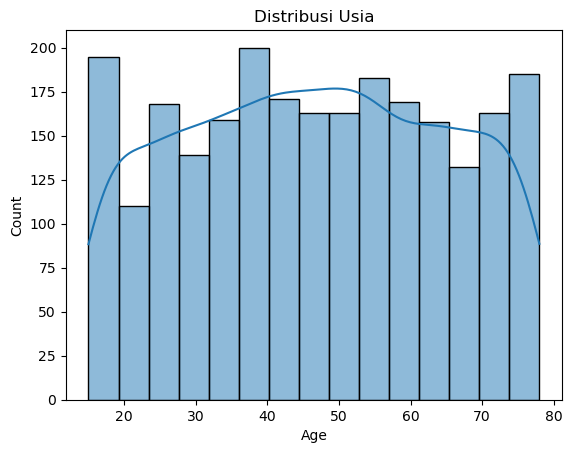

In [16]:
sns.histplot(data=df, x='Age', kde=True)
plt.title('Distribusi Usia')
plt.show()

To ensure that the histogram includes skewness or normality, it is necessary to check it using the rules, if:
* Skewness = 0: Then normally distributed.
* Skewness > 0: Then more weight in the left tail of the distribution.
* Skewness < 0: Then more weight in the right tail of the distribution.

The checking results will determine how to handle null values in the Age column.

In [18]:
skewness = skew(df['Age'])
print(f"Skewness: {skewness}")

Skewness: -0.009210405719477545


Because the normality results are distributed with a skewness histogram, data cleaning can be done by filling in the rows of data that have null values with the median data in the Age column. The following are the steps for cleaning data in the Age column.

In [19]:
val = df.Age.median()
df['Age'] = df.Age.fillna(val)

Check the condition of the data after data cleansing in the Age column, the Age column has now changed its number

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  2500 non-null   object 
 1   Transaction_ID    2500 non-null   int64  
 2   Gender            2500 non-null   object 
 3   Age               2500 non-null   float64
 4   Marital_status    2500 non-null   object 
 5   State_names       2500 non-null   object 
 6   Segment           2500 non-null   object 
 7   Employees_status  2474 non-null   object 
 8   Payment_method    2500 non-null   object 
 9   Referal           2346 non-null   float64
 10  Amount_spent      2259 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 234.4+ KB


Checking for outliers in the data

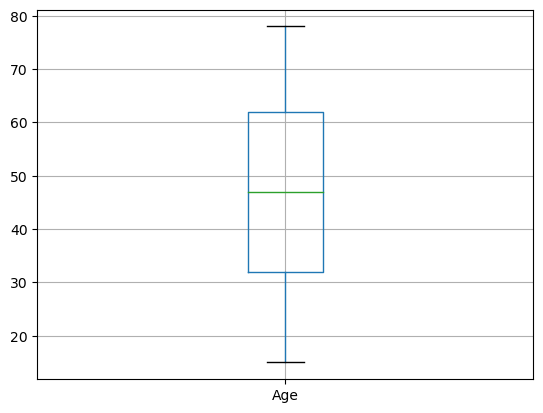

In [21]:
df.boxplot(column=['Age'])
plt.show()

### Employee Status Column

Because the values in the Employee Status column are in the form of strings or categorical, data cleaning can be done by filling in the rows of data that have null values with the mode of the data in the Employee Status column. The following are the data cleansing stages of the Employee Status column.

Check data rows in the Employee Status column that have null/NaN values

In [22]:
df.Employees_status[df.Employees_status.isnull()]

179     NaN
253     NaN
301     NaN
447     NaN
577     NaN
582     NaN
682     NaN
688     NaN
788     NaN
796     NaN
919     NaN
1065    NaN
1195    NaN
1279    NaN
1290    NaN
1309    NaN
1395    NaN
1624    NaN
1660    NaN
1954    NaN
1961    NaN
2199    NaN
2201    NaN
2416    NaN
2436    NaN
2459    NaN
Name: Employees_status, dtype: object

Check the amount of data/values in the categories in the Gender column

In [23]:
df['Employees_status'].isnull().sum()

26

In [24]:
df.Employees_status.value_counts()

Employees        942
workers          795
self-employed    485
Unemployment     252
Name: Employees_status, dtype: int64

From the proportion of the Employee Status column, Employees is the data that appears most often, so Employees is the mode

In [25]:
val = df.Employees_status.mode().values[0]
df['Employees_status'] = df.Employees_status.fillna(val)

After imputation, it can be seen that the proportions have changed

In [26]:
df.Employees_status.value_counts()

Employees        968
workers          795
self-employed    485
Unemployment     252
Name: Employees_status, dtype: int64

Check the condition of the data after data cleansing in the Employee Status column

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  2500 non-null   object 
 1   Transaction_ID    2500 non-null   int64  
 2   Gender            2500 non-null   object 
 3   Age               2500 non-null   float64
 4   Marital_status    2500 non-null   object 
 5   State_names       2500 non-null   object 
 6   Segment           2500 non-null   object 
 7   Employees_status  2500 non-null   object 
 8   Payment_method    2500 non-null   object 
 9   Referal           2346 non-null   float64
 10  Amount_spent      2259 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 234.4+ KB


### Referal Column

Because the values in the Referal column are in the form of categorical , data cleaning can be done by filling in the rows of data that have null values with the mode of the data in the Referal column. The following are the data cleansing stages of the Referal column.

Check data rows in the referal column that have null/NaN values

In [28]:
df.Referal[df.Referal.isnull()]

58     NaN
61     NaN
74     NaN
77     NaN
131    NaN
        ..
2358   NaN
2399   NaN
2417   NaN
2472   NaN
2489   NaN
Name: Referal, Length: 154, dtype: float64

Check the amount of data/values in the categories in the referal column

In [29]:
df['Referal'].isnull().sum()

154

In [30]:
df.Referal.value_counts()

1.0    1529
0.0     817
Name: Referal, dtype: int64

From the proportion of the referal column, use refral code (1) is the data that appears most often, so use refral code (1) is the mode

In [31]:
val = df.Referal.mode().values[0]
df['Referal'] = df.Referal.fillna(val)

After imputation, it can be seen that the proportions have changed

In [32]:
df.Referal.value_counts()

1.0    1683
0.0     817
Name: Referal, dtype: int64

Check the condition of the data after data cleansing in the referal column

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  2500 non-null   object 
 1   Transaction_ID    2500 non-null   int64  
 2   Gender            2500 non-null   object 
 3   Age               2500 non-null   float64
 4   Marital_status    2500 non-null   object 
 5   State_names       2500 non-null   object 
 6   Segment           2500 non-null   object 
 7   Employees_status  2500 non-null   object 
 8   Payment_method    2500 non-null   object 
 9   Referal           2500 non-null   float64
 10  Amount_spent      2259 non-null   float64
dtypes: float64(3), int64(1), object(7)
memory usage: 234.4+ KB


Based on the results of the data inspection, it was found that the referral column used the float data type, this was deemed unsuitable, the data would be easier to understand if converted into a string, where "1.0" means using a referral code, while "0.0" means not using a code referral. This will help people who read the data so that it is easier to understand.

In [34]:
df['Referal'] = df['Referal'].astype(str)

In [35]:
df['Referal'] = df['Referal'].replace({'1.0': 'Use', '0.0': 'Not use'})

In [36]:
df.head()

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,1/1/2019,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,Use,2051.36
1,1/1/2019,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,Not use,544.04
2,1/1/2019,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,Use,1572.60
3,1/1/2019,151203,Female,18.0,Single,Virginia,Platinum,workers,Card,Use,1199.79
4,1/1/2019,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,Not use,NaN


### Amount Spent Column

Check the condition of the data distribution by visualizing it using a histogram

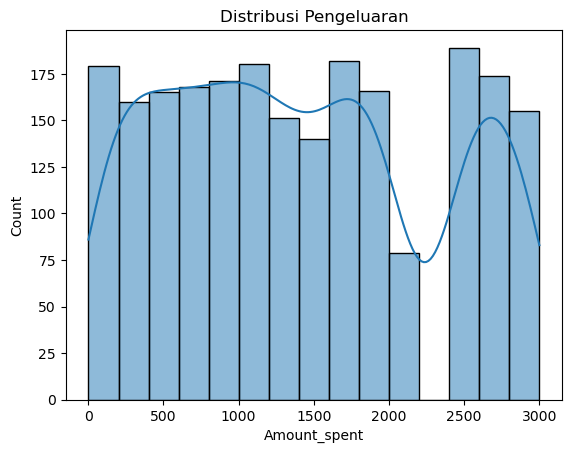

In [37]:
sns.histplot(data=df, x='Amount_spent', kde=True)
plt.title('Distribusi Pengeluaran')
plt.show()

To ensure that the histogram includes skewness or normality, it is necessary to check it using the rules, if:
* Skewness = 0: Then normally distributed.
* Skewness > 0: Then more weight in the left tail of the distribution.
* Skewness < 0: Then more weight in the right tail of the distribution.

The checking results will determine how to handle null values in the Amount_spent column.

In [40]:
skewness = skew(df['Amount_spent'])
print(f"Skewness: {skewness}")

Skewness: 0.2396104557057614


Because the normality results are distributed with a skewness histogram, data cleaning can be done by filling in the rows of data that have null values with the median data in the Amount_spent column. The following are the steps for cleaning data in the Amount_spent column.

In [41]:
val = df.Amount_spent.median()
df['Amount_spent'] = df.Amount_spent.fillna(val)

Check the condition of the data after data cleansing in the Amount_spent column, the Amount_spent column has now changed its number

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Transaction_date  2500 non-null   object 
 1   Transaction_ID    2500 non-null   int64  
 2   Gender            2500 non-null   object 
 3   Age               2500 non-null   float64
 4   Marital_status    2500 non-null   object 
 5   State_names       2500 non-null   object 
 6   Segment           2500 non-null   object 
 7   Employees_status  2500 non-null   object 
 8   Payment_method    2500 non-null   object 
 9   Referal           2500 non-null   object 
 10  Amount_spent      2500 non-null   float64
dtypes: float64(2), int64(1), object(8)
memory usage: 234.4+ KB


Checking for outliers in the data

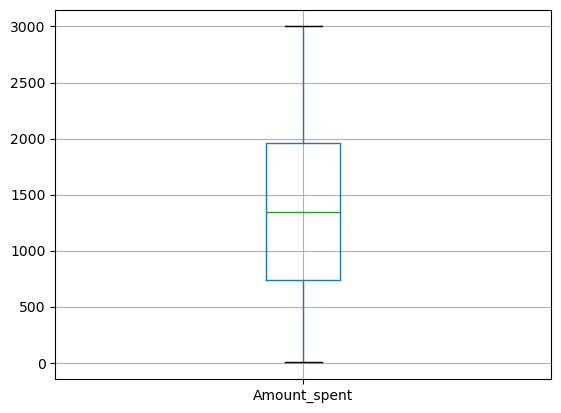

In [43]:
df.boxplot(column=['Amount_spent'])
plt.show()

### Transaction Date

Based on the results of the data inspection, it was found that the transaction date column used the string data type, this was deemed unsuitable. For dates, you should use the datetime data type to make it more suitable and easier to manipulate the data.

In [44]:
df['Transaction_date'] = pd.to_datetime(df['Transaction_date'], format='%m/%d/%Y')

In [45]:
df.head(10)

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,2019-01-01,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,Use,2051.36
1,2019-01-01,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,Not use,544.04
2,2019-01-01,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,Use,1572.60
3,2019-01-01,151203,Female,18.0,Single,Virginia,Platinum,workers,Card,Use,1199.79
4,2019-01-01,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,Not use,1344.45
5,2019-01-03,151205,Male,71.0,Single,Hawaii,Basic,Employees,PayPal,Use,2922.66
6,2019-01-03,151206,Female,34.0,Married,New Mexico,Platinum,Employees,PayPal,Use,1481.42
7,2019-01-03,151207,Male,37.0,Married,Connecticut,Basic,workers,PayPal,Use,1149.55
8,2019-01-04,151208,Male,75.0,Married,Florida,Silver,Employees,Card,Not use,1046.20
9,2019-01-04,151209,Female,41.0,Married,Vermont,Gold,Unemployment,Card,Use,2730.60


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2500 entries, 0 to 2511
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction_date  2500 non-null   datetime64[ns]
 1   Transaction_ID    2500 non-null   int64         
 2   Gender            2500 non-null   object        
 3   Age               2500 non-null   float64       
 4   Marital_status    2500 non-null   object        
 5   State_names       2500 non-null   object        
 6   Segment           2500 non-null   object        
 7   Employees_status  2500 non-null   object        
 8   Payment_method    2500 non-null   object        
 9   Referal           2500 non-null   object        
 10  Amount_spent      2500 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 234.4+ KB


In [47]:
print(df['Transaction_date'].dtype)  

datetime64[ns]
